In [1]:
import numpy as np
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from keras.utils.vis_utils import plot_model
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Input, TimeDistributed
from keras.utils import to_categorical
from keras.layers import concatenate
import seaborn as sns

# 데이터 로드

In [2]:
# load a single file as a numpy array
def load_file(filepath):
    dataframe = read_csv(filepath, header=None, delim_whitespace=True)
    return dataframe.values

In [3]:
# load a list of files into a 3D array of [samples, timesteps, features]
def load_group(filenames, prefix=''):
    loaded = list()
    for name in filenames:
        data = load_file(prefix + name)
        loaded.append(data)
     # stack group so that features are the 3rd dimension
    loaded = dstack(loaded)
    return loaded

In [4]:
# load a dataset group, such as train or test
def load_dataset_group(group, prefix=''):
 filepath = prefix + group + '/Inertial Signals/'
 # load all 9 files as a single array
 filenames = list()
 # total acceleration
 filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
 # body acceleration
 filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
 # body gyroscope
 filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
 # load input data
 X = load_group(filenames, filepath)
 # load class output
 y = load_file(prefix + group + '/y_'+group+'.txt')
 return X, y

In [5]:
# load the dataset, returns train and test X and y elements
def load_dataset(prefix=''):
    # load all train
    
    print('load_dataset append_before = {}'.format(prefix))
    trainX, trainy = load_dataset_group('train', prefix + 'C:/Users/procns/Desktop/인공지능/HAR/UCI-HAR/HARDataset/')
    print(trainX.shape, trainy.shape)
    # load all test
    testX, testy = load_dataset_group('test', prefix + 'C:/Users/procns/Desktop/인공지능/HAR/UCI-HAR/HARDataset/')
    print(testX.shape, testy.shape)
    # zero-offset class values
    
    trainy = trainy - 1
    testy = testy - 1

    # one hot encode y
    trainy = to_categorical(trainy)
    testy = to_categorical(testy)
    print(trainX.shape, trainy.shape, testX.shape, testy.shape)
    return trainX, trainy, testX, testy

In [6]:
trainX, trainy, testX, testy = load_dataset()

load_dataset append_before = 
(7352, 128, 9) (7352, 1)
(2947, 128, 9) (2947, 1)
(7352, 128, 9) (7352, 6) (2947, 128, 9) (2947, 6)


# Model

In [7]:
verbose, epochs, batch_size = 1, 10, 32
n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

 
 # fit network

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 126, 64)           1792      
                                                                 
 conv1d_1 (Conv1D)           (None, 124, 64)           12352     
                                                                 
 dropout (Dropout)           (None, 124, 64)           0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 62, 64)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 3968)              0         
                                                                 
 dense (Dense)               (None, 100)               396900    
                                                        

In [9]:
history = model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)

Epoch 1/10
230/230 [==============================] - 5s 16ms/step - loss: 0.3729 - accuracy: 0.8517
Epoch 2/10
230/230 [==============================] - 4s 16ms/step - loss: 0.1449 - accuracy: 0.9431
Epoch 3/10
230/230 [==============================] - 3s 15ms/step - loss: 0.1251 - accuracy: 0.9483
Epoch 4/10
230/230 [==============================] - 4s 15ms/step - loss: 0.1165 - accuracy: 0.9540
Epoch 5/10
230/230 [==============================] - 4s 15ms/step - loss: 0.1006 - accuracy: 0.9567
Epoch 6/10
230/230 [==============================] - 4s 15ms/step - loss: 0.0935 - accuracy: 0.9604
Epoch 7/10
230/230 [==============================] - 4s 16ms/step - loss: 0.0959 - accuracy: 0.9596
Epoch 8/10
230/230 [==============================] - 4s 16ms/step - loss: 0.0833 - accuracy: 0.9627
Epoch 9/10
230/230 [==============================] - 4s 16ms/step - loss: 0.0800 - accuracy: 0.9638
Epoch 10/10
230/230 [==============================] - 4s 16ms/step - loss: 0.0734 - accura

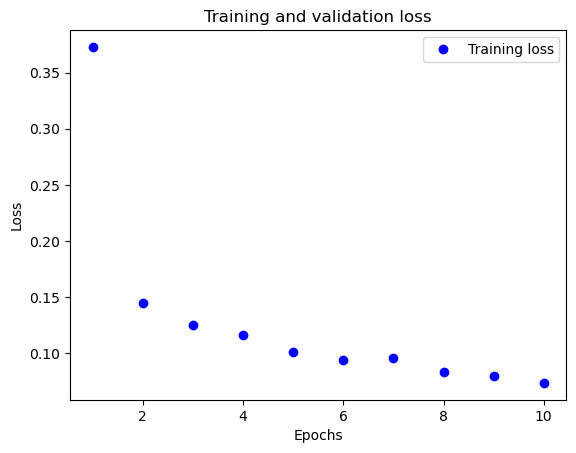

In [10]:
history_dict = history.history
loss = history_dict['loss']
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss'] 
#val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss') 
#plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()
plt.show()

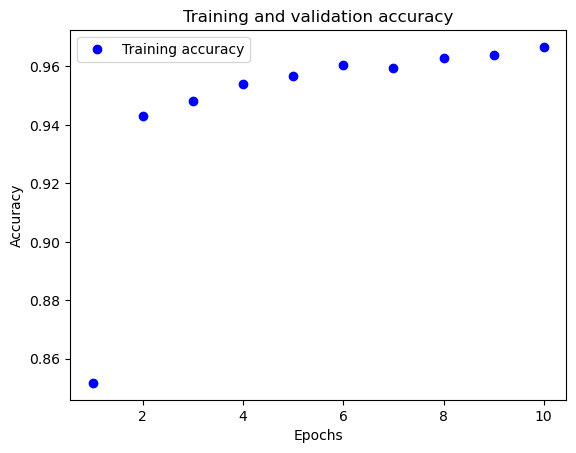

In [11]:
history_dict = history.history
loss = history_dict['loss']
import matplotlib.pyplot as plt
history_dict = history.history
accuracy_values = history_dict['accuracy'] 
#val_accuracy_values = history_dict['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, accuracy_values, 'bo', label='Training accuracy') 
#plt.plot(epochs, val_accuracy_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy') 
plt.xlabel('Epochs')
plt.ylabel('Accuracy') 
plt.legend()
plt.show()

In [12]:
base_loss,base_accuracy=model.evaluate(testX,testy,batch_size = batch_size,verbose=1)

#cnn_file='CNN_Model.h5'
#tf.keras.models.save_model(model, cnn_file, include_optimizer=False)
#print('model saved at ', cnn_file)
#score,keras_file=evaluate_model(trainX,trainy,testX,testy)
score=base_accuracy*100
print('Accuracy >{:f}'.format(score))
print('Base Loss >{:.2f}'.format(base_loss))

93/93 [==============================] - 1s 4ms/step - loss: 0.4985 - accuracy: 0.9104
Accuracy >91.041738
Base Loss >0.50


93/93 [==============================] - 0s 4ms/step


<Axes: >

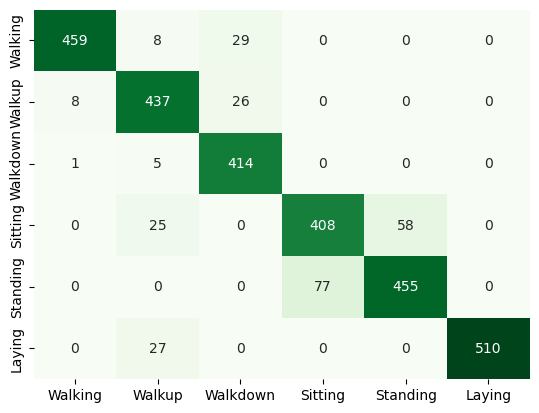

In [13]:
from sklearn.metrics import confusion_matrix
import pandas as pd
activity = ['Walking','Walkup','Walkdown','Sitting','Standing','Laying']

pred_cnn = model.predict(testX)
len(pred_cnn)
y_true = np.argmax(testy, axis = 1)
y_pred = np.argmax(pred_cnn, axis=1)
#y_pred = [0] * len(pred_cnn)
#for i in range(len(pred_cnn)):
#    y_pred[i] = np.argmax(pred_cnn[i])
cm_cnn = confusion_matrix(y_true, y_pred)
cm_df_cnn = pd.DataFrame(cm_cnn, index= activity, columns=activity)

sns.heatmap(cm_df_cnn,cbar=False,annot=True,cmap="Greens",fmt="d")    

In [14]:
#Accuracy of the predicted values
y_pred = model.predict(testX)

y_test_class = np.argmax(testy,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)


from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

93/93 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.98      0.93      0.95       496
           1       0.87      0.93      0.90       471
           2       0.88      0.99      0.93       420
           3       0.84      0.83      0.84       491
           4       0.89      0.86      0.87       532
           5       1.00      0.95      0.97       537

    accuracy                           0.91      2947
   macro avg       0.91      0.91      0.91      2947
weighted avg       0.91      0.91      0.91      2947

[[459   8  29   0   0   0]
 [  8 437  26   0   0   0]
 [  1   5 414   0   0   0]
 [  0  25   0 408  58   0]
 [  0   0   0  77 455   0]
 [  0  27   0   0   0 510]]


# LSTM

In [15]:
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from tensorflow.keras import optimizers

In [16]:
input_shape=(n_timesteps,n_features)
model = Sequential()
model.add(LSTM(64, input_shape= input_shape))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
adam = optimizers.Adam(learning_rate = 0.001)
model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
model.summary()
    
 # fit network
model_history=model.fit(x=trainX, y=trainy, epochs=30, batch_size=32)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                18944     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 100)               6500      
                                                                 
 dense_3 (Dense)             (None, 6)                 606       
                                                                 
Total params: 26,050
Trainable params: 26,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
230/230 [==============================] - 18s 67ms/step - loss: 1.0912 - accuracy: 0.5271
Epoch 2/30
230/230 [==============================] - 15s 66ms/step - loss: 0.67

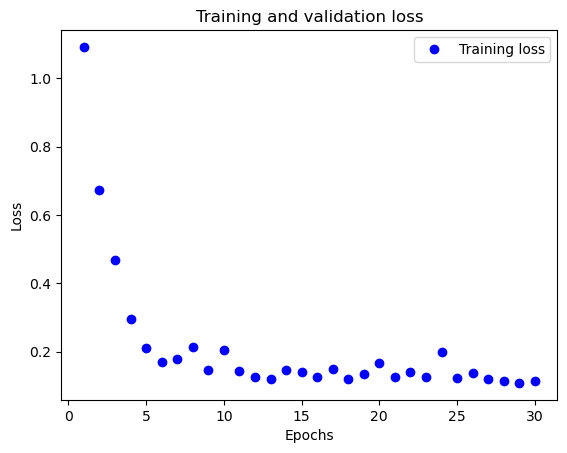

In [17]:
history_dict = model_history.history
loss = history_dict['loss']
import matplotlib.pyplot as plt
history_dict = model_history.history
loss_values = history_dict['loss'] 
#val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss') 
#plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()
plt.show()

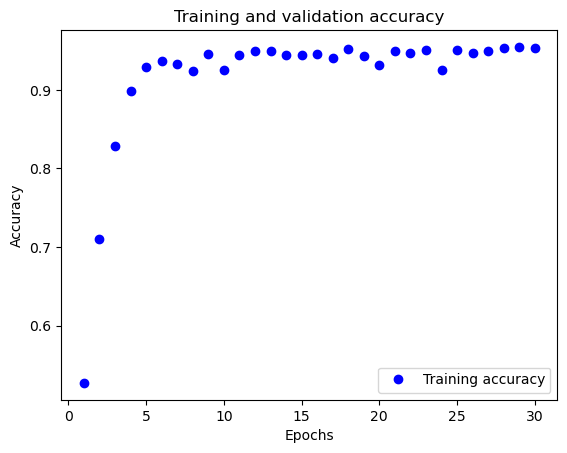

In [18]:
history_dict = model_history.history
loss = history_dict['loss']
import matplotlib.pyplot as plt
history_dict = model_history.history
accuracy_values = history_dict['accuracy'] 
#val_accuracy_values = history_dict['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, accuracy_values, 'bo', label='Training accuracy') 
#plt.plot(epochs, val_accuracy_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy') 
plt.xlabel('Epochs')
plt.ylabel('Accuracy') 
plt.legend()
plt.show()

In [19]:
base_loss,base_accuracy=model.evaluate(testX,testy,batch_size = batch_size,verbose=1)

#cnn_file='CNN_Model.h5'
#tf.keras.models.save_model(model, cnn_file, include_optimizer=False)
#print('model saved at ', cnn_file)
#score,keras_file=evaluate_model(trainX,trainy,testX,testy)
score=base_accuracy*100
print('Accuracy >{:f}'.format(score))
print('Base Loss >{:.2f}'.format(base_loss))

93/93 [==============================] - 3s 24ms/step - loss: 0.3554 - accuracy: 0.9172
Accuracy >91.720396
Base Loss >0.36


93/93 [==============================] - 3s 25ms/step


<Axes: >

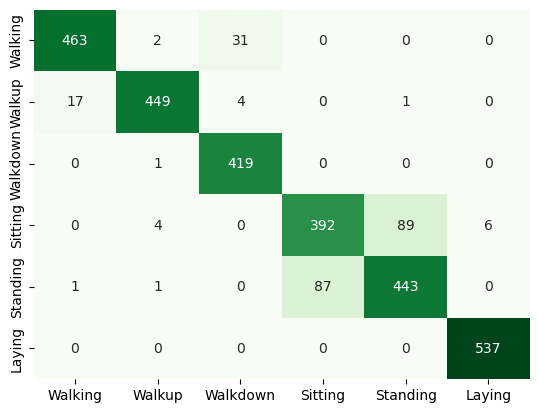

In [20]:
from sklearn.metrics import confusion_matrix
import pandas as pd
activity = ['Walking','Walkup','Walkdown','Sitting','Standing','Laying']

pred_cnn = model.predict(testX)
len(pred_cnn)
y_true = np.argmax(testy, axis = 1)
y_pred = np.argmax(pred_cnn, axis=1)
#y_pred = [0] * len(pred_cnn)
#for i in range(len(pred_cnn)):
#    y_pred[i] = np.argmax(pred_cnn[i])
cm_cnn = confusion_matrix(y_true, y_pred)
cm_df_cnn = pd.DataFrame(cm_cnn, index= activity, columns=activity)

sns.heatmap(cm_df_cnn,cbar=False,annot=True,cmap="Greens",fmt="d")    

# BILSTM

In [34]:
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Bidirectional
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from tensorflow.keras import optimizers

In [36]:
input_shape=(n_timesteps,n_features)
model = Sequential()
model.add(Bidirectional(LSTM(64, input_shape= input_shape)))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
adam = optimizers.Adam(learning_rate = 0.001)
model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
#model.summary()
    
 # fit network
model_history=model.fit(x=trainX, y=trainy, epochs=30, batch_size=32)

Epoch 1/30
230/230 [==============================] - 18s 62ms/step - loss: 1.0366 - accuracy: 0.5630
Epoch 2/30
230/230 [==============================] - 14s 63ms/step - loss: 0.6020 - accuracy: 0.7440
Epoch 3/30
230/230 [==============================] - 15s 66ms/step - loss: 0.7829 - accuracy: 0.6700
Epoch 4/30
230/230 [==============================] - 16s 67ms/step - loss: 0.5495 - accuracy: 0.7580
Epoch 5/30
230/230 [==============================] - 16s 69ms/step - loss: 0.3975 - accuracy: 0.8338
Epoch 6/30
230/230 [==============================] - 16s 70ms/step - loss: 0.3317 - accuracy: 0.8747
Epoch 7/30
230/230 [==============================] - 15s 67ms/step - loss: 0.4631 - accuracy: 0.8094
Epoch 8/30
230/230 [==============================] - 16s 68ms/step - loss: 0.3052 - accuracy: 0.8773
Epoch 9/30
230/230 [==============================] - 16s 68ms/step - loss: 0.2412 - accuracy: 0.9067
Epoch 10/30
230/230 [==============================] - 16s 68ms/step - loss: 0.181

In [37]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_3 (Bidirectio  (None, 128)              37888     
 nal)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_14 (Dense)            (None, 100)               12900     
                                                                 
 dense_15 (Dense)            (None, 6)                 606       
                                                                 
Total params: 51,394
Trainable params: 51,394
Non-trainable params: 0
_________________________________________________________________


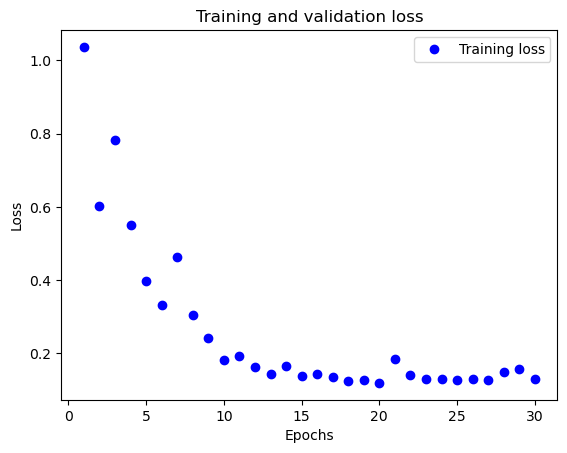

In [38]:
history_dict = model_history.history
loss = history_dict['loss']
import matplotlib.pyplot as plt
history_dict = model_history.history
loss_values = history_dict['loss'] 
#val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss') 
#plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()
plt.show()

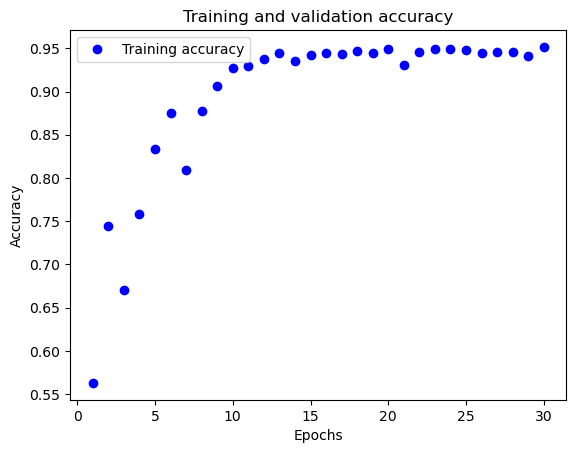

In [39]:
history_dict = model_history.history
loss = history_dict['loss']
import matplotlib.pyplot as plt
history_dict = model_history.history
accuracy_values = history_dict['accuracy'] 
#val_accuracy_values = history_dict['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, accuracy_values, 'bo', label='Training accuracy') 
#plt.plot(epochs, val_accuracy_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy') 
plt.xlabel('Epochs')
plt.ylabel('Accuracy') 
plt.legend()
plt.show()

In [40]:
base_loss,base_accuracy=model.evaluate(testX,testy,batch_size = batch_size,verbose=1)

#cnn_file='CNN_Model.h5'
#tf.keras.models.save_model(model, cnn_file, include_optimizer=False)
#print('model saved at ', cnn_file)
#score,keras_file=evaluate_model(trainX,trainy,testX,testy)
score=base_accuracy*100
print('Accuracy >{:f}'.format(score))
print('Base Loss >{:.2f}'.format(base_loss))

93/93 [==============================] - 3s 26ms/step - loss: 0.3498 - accuracy: 0.9080
Accuracy >90.804207
Base Loss >0.35


93/93 [==============================] - 3s 25ms/step


<Axes: >

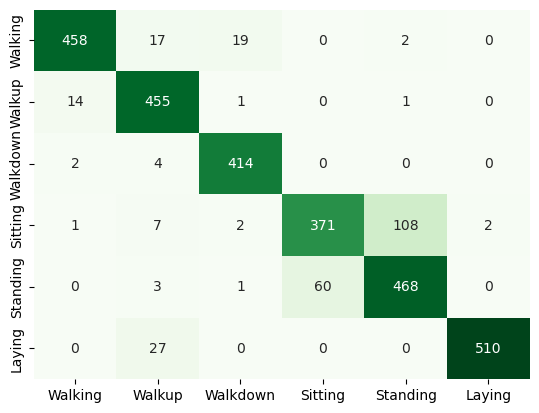

In [41]:
from sklearn.metrics import confusion_matrix
import pandas as pd
activity = ['Walking','Walkup','Walkdown','Sitting','Standing','Laying']

pred_cnn = model.predict(testX)
len(pred_cnn)
y_true = np.argmax(testy, axis = 1)
y_pred = np.argmax(pred_cnn, axis=1)
#y_pred = [0] * len(pred_cnn)
#for i in range(len(pred_cnn)):
#    y_pred[i] = np.argmax(pred_cnn[i])
cm_cnn = confusion_matrix(y_true, y_pred)
cm_df_cnn = pd.DataFrame(cm_cnn, index= activity, columns=activity)

sns.heatmap(cm_df_cnn,cbar=False,annot=True,cmap="Greens",fmt="d")    

# CNN-LSTM

In [28]:
X_train, y_train, X_test, y_test = load_dataset()

load_dataset append_before = 
(7352, 128, 9) (7352, 1)
(2947, 128, 9) (2947, 1)
(7352, 128, 9) (7352, 6) (2947, 128, 9) (2947, 6)


In [29]:
verbose, epochs, batch_size = 0, 10, 32
n_steps = 4
n_length = 32
X_train = X_train.reshape((X_train.shape[0], n_steps, n_length, n_features))
X_test = X_test.reshape((X_test.shape[0], n_steps, n_length, n_features))
X_train.shape, X_test.shape

((7352, 4, 32, 9), (2947, 4, 32, 9))

In [30]:
n_timesteps, n_features, n_outputs = n_steps * n_length, X_train.shape[3], y_train.shape[1]

In [24]:
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=128, kernel_size=4, activation='relu'), input_shape=(None,n_length,n_features)))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))

model.add(TimeDistributed(Conv1D(filters=128, kernel_size=4, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Flatten()))

model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(128))
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, None, 29, 128)    4736      
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, None, 14, 128)    0         
 tributed)                                                       
                                                                 
 time_distributed_2 (TimeDis  (None, None, 11, 128)    65664     
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, None, 5, 128)     0         
 tributed)                                                       
                                                                 
 time_distributed_4 (TimeDis  (None, None, 640)       

In [89]:
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)

Epoch 1/10
230/230 [==============================] - 22s 47ms/step - loss: 0.5477 - accuracy: 0.7734
Epoch 2/10
230/230 [==============================] - 11s 46ms/step - loss: 0.1801 - accuracy: 0.9336
Epoch 3/10
230/230 [==============================] - 11s 46ms/step - loss: 0.1413 - accuracy: 0.9426
Epoch 4/10
230/230 [==============================] - 11s 47ms/step - loss: 0.1243 - accuracy: 0.9476
Epoch 5/10
230/230 [==============================] - 11s 48ms/step - loss: 0.1156 - accuracy: 0.9514
Epoch 6/10
230/230 [==============================] - 11s 46ms/step - loss: 0.1062 - accuracy: 0.9551
Epoch 7/10
230/230 [==============================] - 11s 47ms/step - loss: 0.1260 - accuracy: 0.9495
Epoch 8/10
230/230 [==============================] - 10s 46ms/step - loss: 0.1101 - accuracy: 0.9531
Epoch 9/10
230/230 [==============================] - 11s 47ms/step - loss: 0.1154 - accuracy: 0.9520
Epoch 10/10
230/230 [==============================] - 11s 47ms/step - loss: 0.116

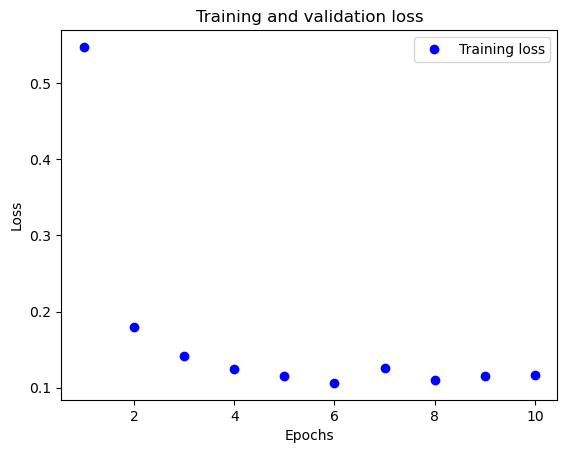

In [90]:
history_dict = history.history
loss = history_dict['loss']
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss'] 
#val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss') 
#plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()
plt.show()

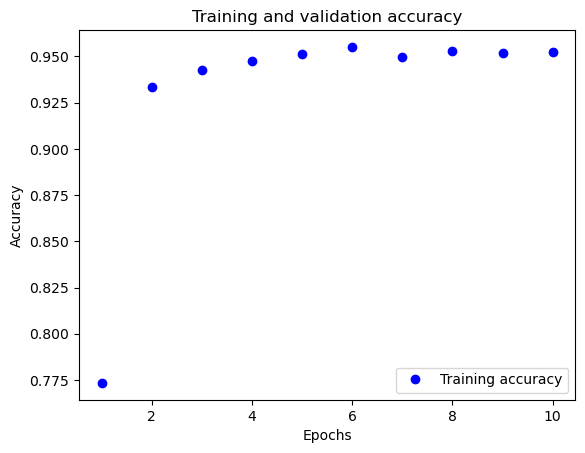

In [91]:
history_dict = history.history
loss = history_dict['loss']
import matplotlib.pyplot as plt
history_dict = history.history
accuracy_values = history_dict['accuracy'] 
#val_accuracy_values = history_dict['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, accuracy_values, 'bo', label='Training accuracy') 
#plt.plot(epochs, val_accuracy_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy') 
plt.xlabel('Epochs')
plt.ylabel('Accuracy') 
plt.legend()
plt.show()

In [92]:
base_loss,base_accuracy= model.evaluate(X_test,y_test,batch_size = batch_size,verbose=1)

#cnn_file='CNN_Model.h5'
#tf.keras.models.save_model(model, cnn_file, include_optimizer=False)
#print('model saved at ', cnn_file)
#score,keras_file=evaluate_model(trainX,trainy,testX,testy)
score=base_accuracy*100
print('Accuracy >{:f}'.format(score))
print('Base Loss >{:.2f}'.format(base_loss))

93/93 [==============================] - 4s 18ms/step - loss: 0.2545 - accuracy: 0.9128
Accuracy >91.279268
Base Loss >0.25


93/93 [==============================] - 4s 16ms/step


<Axes: >

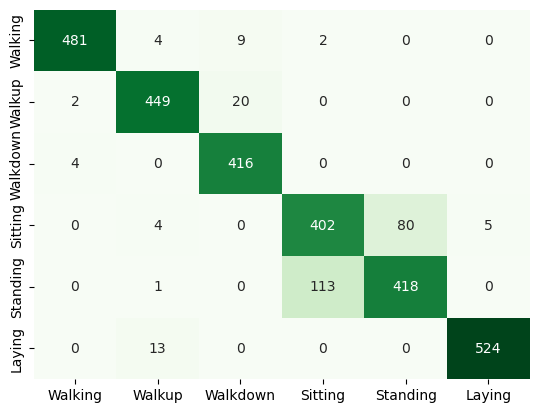

In [93]:
from sklearn.metrics import confusion_matrix
import pandas as pd
activity = ['Walking','Walkup','Walkdown','Sitting','Standing','Laying']

pred_cnn = model.predict(X_test)
len(pred_cnn)
y_true = np.argmax(y_test, axis = 1)
y_pred = np.argmax(pred_cnn, axis=1)
#y_pred = [0] * len(pred_cnn)
#for i in range(len(pred_cnn)):
#    y_pred[i] = np.argmax(pred_cnn[i])
cm_cnn = confusion_matrix(y_true, y_pred)
cm_df_cnn = pd.DataFrame(cm_cnn, index= activity, columns=activity)

sns.heatmap(cm_df_cnn,cbar=False,annot=True,cmap="Greens",fmt="d")    

# GRU

In [12]:
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, GRU,  Bidirectional
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from tensorflow.keras import optimizers

In [51]:
input_shape=(n_timesteps,n_features)
model = Sequential()
model.add(GRU(64, input_shape= input_shape))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
adam = optimizers.Adam(learning_rate = 0.001)
model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
model.summary()
    
 # fit network
model_history=model.fit(x=trainX, y=trainy, epochs=30, batch_size=32)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 64)                14400     
                                                                 
 dropout_10 (Dropout)        (None, 64)                0         
                                                                 
 dense_18 (Dense)            (None, 100)               6500      
                                                                 
 dense_19 (Dense)            (None, 6)                 606       
                                                                 
Total params: 21,506
Trainable params: 21,506
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
230/230 [==============================] - 17s 63ms/step - loss: 1.1663 - accuracy: 0.5118
Epoch 2/30
230/230 [==============================] - 15s 65ms/step - loss: 0.74

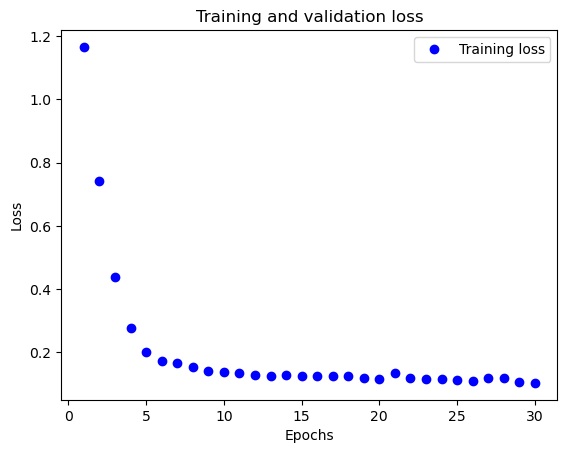

In [52]:
history_dict = model_history.history
loss = history_dict['loss']
import matplotlib.pyplot as plt
history_dict = model_history.history
loss_values = history_dict['loss'] 
#val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss') 
#plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()
plt.show()

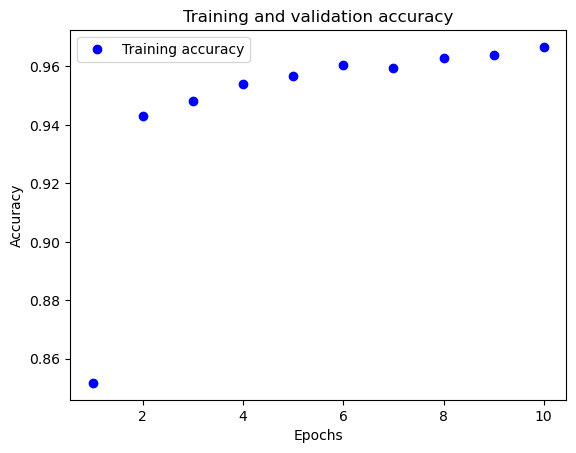

In [53]:
history_dict = history.history
loss = history_dict['loss']
import matplotlib.pyplot as plt
history_dict = history.history
accuracy_values = history_dict['accuracy'] 
#val_accuracy_values = history_dict['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, accuracy_values, 'bo', label='Training accuracy') 
#plt.plot(epochs, val_accuracy_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy') 
plt.xlabel('Epochs')
plt.ylabel('Accuracy') 
plt.legend()
plt.show()

In [55]:
base_loss,base_accuracy=model.evaluate(testX,testy,batch_size = batch_size,verbose=1)

#cnn_file='CNN_Model.h5'
#tf.keras.models.save_model(model, cnn_file, include_optimizer=False)
#print('model saved at ', cnn_file)
#score,keras_file=evaluate_model(trainX,trainy,testX,testy)
score=base_accuracy*100
print('Accuracy >{:f}'.format(score))
print('Base Loss >{:.2f}'.format(base_loss))

93/93 [==============================] - 3s 24ms/step - loss: 0.3707 - accuracy: 0.9097
Accuracy >90.973872
Base Loss >0.37


93/93 [==============================] - 2s 23ms/step


<Axes: >

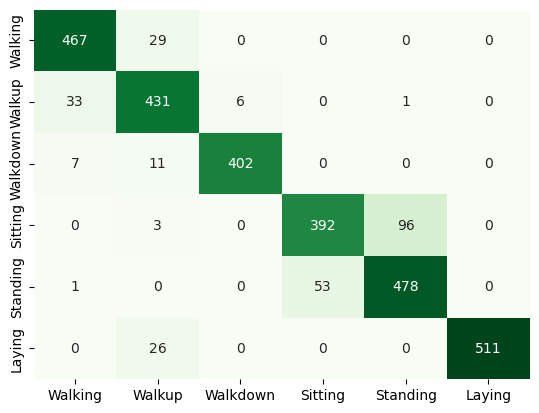

In [58]:
from sklearn.metrics import confusion_matrix
import pandas as pd
activity = ['Walking','Walkup','Walkdown','Sitting','Standing','Laying']

pred_cnn = model.predict(testX)
len(pred_cnn)
y_true = np.argmax(testy, axis = 1)
y_pred = np.argmax(pred_cnn, axis=1)
#y_pred = [0] * len(pred_cnn)
#for i in range(len(pred_cnn)):
#    y_pred[i] = np.argmax(pred_cnn[i])
cm_cnn = confusion_matrix(y_true, y_pred)
cm_df_cnn = pd.DataFrame(cm_cnn, index= activity, columns=activity)

sns.heatmap(cm_df_cnn,cbar=False,annot=True,cmap="Greens",fmt="d")    

# BIGRU

In [13]:
verbose, epochs, batch_size = 1, 10, 32
n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]

input_shape=(n_timesteps,n_features)
model = Sequential()
model.add(Bidirectional(GRU(64, input_shape= input_shape)))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
adam = optimizers.Adam(learning_rate = 0.001)
model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
#model.summary()
    
 # fit network
model_history=model.fit(x=trainX, y=trainy, epochs=30, batch_size=32)

Epoch 1/30
230/230 [==============================] - 17s 58ms/step - loss: 1.1063 - accuracy: 0.5362
Epoch 2/30
230/230 [==============================] - 13s 56ms/step - loss: 0.5535 - accuracy: 0.7786
Epoch 3/30
230/230 [==============================] - 14s 59ms/step - loss: 0.3004 - accuracy: 0.8919
Epoch 4/30
230/230 [==============================] - 14s 60ms/step - loss: 0.2128 - accuracy: 0.9176
Epoch 5/30
230/230 [==============================] - 15s 65ms/step - loss: 0.1728 - accuracy: 0.9327
Epoch 6/30
230/230 [==============================] - 15s 66ms/step - loss: 0.1589 - accuracy: 0.9376
Epoch 7/30
230/230 [==============================] - 15s 67ms/step - loss: 0.1471 - accuracy: 0.9421
Epoch 8/30
230/230 [==============================] - 16s 68ms/step - loss: 0.1487 - accuracy: 0.9399
Epoch 9/30
230/230 [==============================] - 14s 62ms/step - loss: 0.1425 - accuracy: 0.9416
Epoch 10/30
230/230 [==============================] - 14s 63ms/step - loss: 0.131

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 128)              28800     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 100)               12900     
                                                                 
 dense_1 (Dense)             (None, 6)                 606       
                                                                 
Total params: 42,306
Trainable params: 42,306
Non-trainable params: 0
_________________________________________________________________


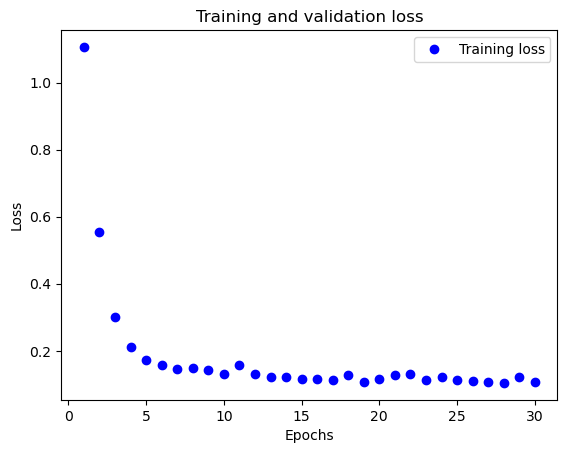

In [15]:
history_dict = model_history.history
loss = history_dict['loss']
import matplotlib.pyplot as plt
history_dict = model_history.history
loss_values = history_dict['loss'] 
#val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss') 
#plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()
plt.show()

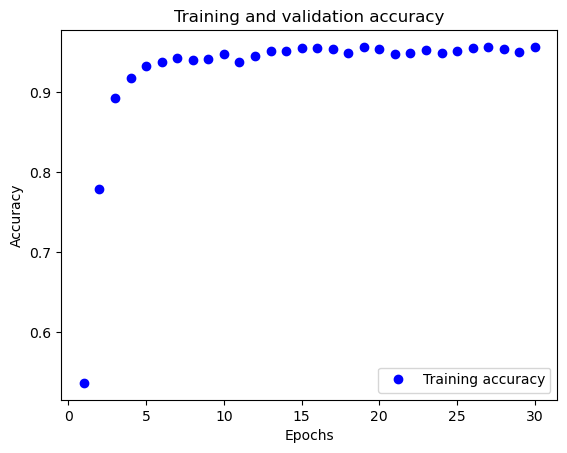

In [19]:
history_dict = model_history.history
loss = history_dict['loss']
import matplotlib.pyplot as plt
history_dict = model_history.history
accuracy_values = history_dict['accuracy'] 
#val_accuracy_values = history_dict['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, accuracy_values, 'bo', label='Training accuracy') 
#plt.plot(epochs, val_accuracy_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy') 
plt.xlabel('Epochs')
plt.ylabel('Accuracy') 
plt.legend()
plt.show()

In [20]:
base_loss,base_accuracy=model.evaluate(testX,testy,batch_size = batch_size,verbose=1)

#cnn_file='CNN_Model.h5'
#tf.keras.models.save_model(model, cnn_file, include_optimizer=False)
#print('model saved at ', cnn_file)
#score,keras_file=evaluate_model(trainX,trainy,testX,testy)
score=base_accuracy*100
print('Accuracy >{:f}'.format(score))
print('Base Loss >{:.2f}'.format(base_loss))

93/93 [==============================] - 2s 18ms/step - loss: 0.2818 - accuracy: 0.9063
Accuracy >90.634543
Base Loss >0.28


93/93 [==============================] - 2s 18ms/step


<Axes: >

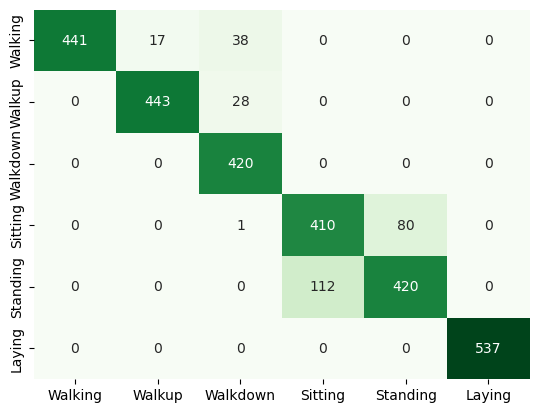

In [21]:
from sklearn.metrics import confusion_matrix
import pandas as pd
activity = ['Walking','Walkup','Walkdown','Sitting','Standing','Laying']

pred_cnn = model.predict(testX)
len(pred_cnn)
y_true = np.argmax(testy, axis = 1)
y_pred = np.argmax(pred_cnn, axis=1)
#y_pred = [0] * len(pred_cnn)
#for i in range(len(pred_cnn)):
#    y_pred[i] = np.argmax(pred_cnn[i])
cm_cnn = confusion_matrix(y_true, y_pred)
cm_df_cnn = pd.DataFrame(cm_cnn, index= activity, columns=activity)

sns.heatmap(cm_df_cnn,cbar=False,annot=True,cmap="Greens",fmt="d")    